In [ ]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif, mutual_info_classif, mutual_info_regression
import tqdm
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean

function_to_test = [ chi2, f_regression, f_classif, mutual_info_classif, mutual_info_regression ]
NB_to_test = [ MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB ]

df = pd.read_csv('./../datasets/dataset_for_ML.csv')
X = pd.get_dummies(df.drop(['result'], axis=1))
y = df['result'].apply(lambda x: 2 if x == 'victory' else 1 if x == 'draw' else 0)

with open('outNB', 'w') as f:
    for nb in NB_to_test:
        cv = KFold(n_splits=10, shuffle=True, random_state=1)
        print(nb.__name__)
        for func in function_to_test:
            print(func.__name__)
            for k in tqdm.tqdm(range(5, 199)):
                # normalization
                X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

                X_new = SelectKBest(func, k=k).fit_transform(X, y)
                gnb = nb()
                scores = cross_val_score(gnb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
                f.write(f'{mean(scores)}\n')

## Results
### MultinomialNB:
| function used          | mean test accuracy |
|------------------------|------------------- |
| chi2                   | 0.45495            |
| f_regression           | 0.45495            |
| f_classif              | 0.45495            |
| mutual_info_classif    | 0.45495            |
| mutual_info_regression | 0.45495            |

### ComplementNB:
| function used          | mean test accuracy |
|------------------------|------------------- |
| chi2                   | 0.50164            |
| f_regression           | 0.50164            |
| f_classif              | 0.50164            |
| mutual_info_classif    | 0.50164            |
| mutual_info_regression | 0.50164            |

### BernoulliNB:
| function used          | mean test accuracy |
|------------------------|------------------- |
| chi2                   | 0.50335            |
| f_regression           | 0.50335            |
| f_classif              | 0.50335            |
| mutual_info_classif    | 0.50335            |
| mutual_info_regression | 0.50335            |

### CategoricalNB:
| function used          | mean test accuracy |
|------------------------|------------------- |
| chi2                   | 0.44925            |
| f_regression           | 0.44925            |
| f_classif              | 0.44925            |
| mutual_info_classif    | 0.44925            |
| mutual_info_regression | 0.44925            |

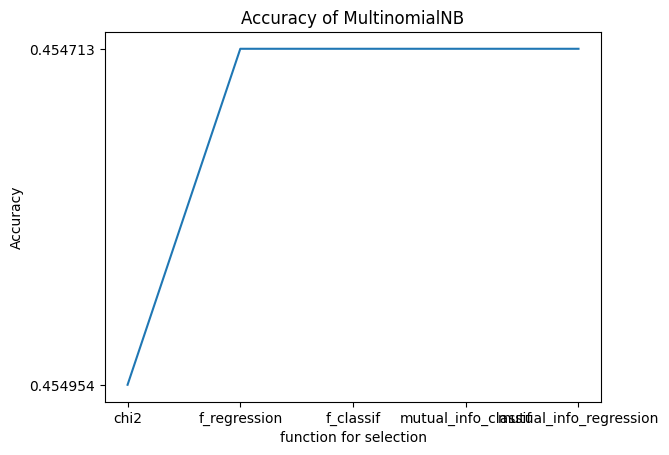

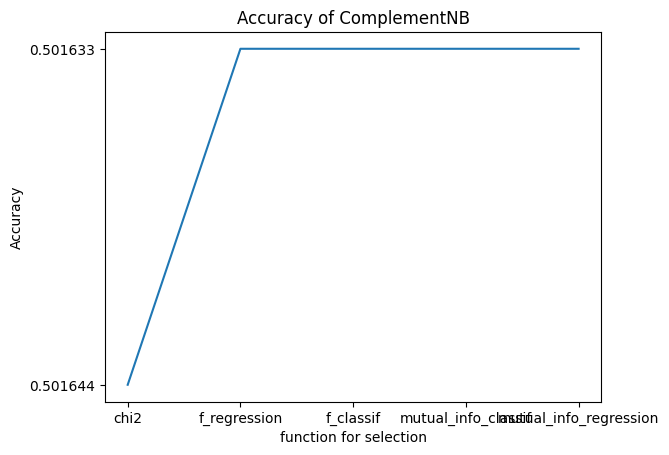

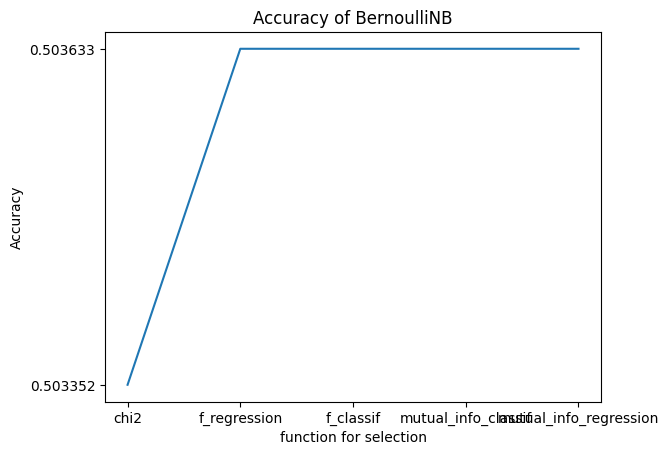

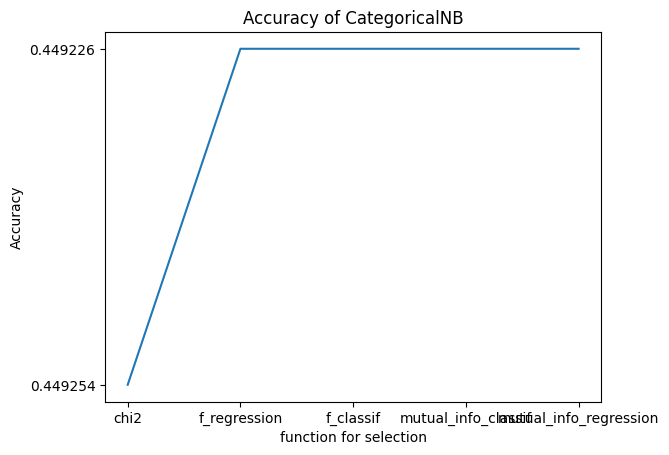

In [10]:
import numpy as np
import matplotlib.pyplot as plt

lines = {
    'MultinomialNB':{
        'chi2':                    [],
        'f_regression':            [],
        'f_classif':               [],
        'mutual_info_classif':     [],
        'mutual_info_regression':  [],
    },
    'ComplementNB':{
        'chi2':                    [],
        'f_regression':            [],
        'f_classif':               [],
        'mutual_info_classif':     [],
        'mutual_info_regression':  [],
    },
    'BernoulliNB':{
        'chi2':                    [],
        'f_regression':            [],
        'f_classif':               [],
        'mutual_info_classif':     [],
        'mutual_info_regression':  [],
    },
    'CategoricalNB':{
        'chi2':                    [],
        'f_regression':            [],
        'f_classif':               [],
        'mutual_info_classif':     [],
        'mutual_info_regression':  [],
    }
}

NB = [
    'MultinomialNB',
    'ComplementNB',
    'BernoulliNB',
    'CategoricalNB',
]

FUNC = [    
    'chi2',
    'f_regression',
    'f_classif',
    'mutual_info_classif',
    'mutual_info_regression',
]

with open('outNB') as f:
    nb_count = 0
    func_count = 0
    for i, line in enumerate(f):
        lines[NB[nb_count]][FUNC[func_count]].append(float(line))
        if i % 194 == 0:
            func_count = (func_count + 1) % len(FUNC)
        if i % (194 * len(FUNC)) == 0:
            nb_count = (nb_count + 1) % len(NB)

import numpy as np

for nb in lines:
    for func in lines[nb]:
        lines[nb][func] = np.mean(lines[nb][func])

for nb, func in lines.items():
    x = np.arange(0, len(FUNC))
    y = np.array([f'{val:.6f}' for val in func.values()])
    
    plt.title(f'Accuracy of {nb}')
    plt.xticks(x, FUNC)
    plt.xlabel('function for selection')
    plt.ylabel('Accuracy')
    plt.plot(x, y)
    plt.show()